## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 1

### Q2. Accurate measurement of body fat is inconvenient/costly, and it is desirable to have easy methods of predicting Body Fat. Using the given Body Fat dataset, build a Neural Network to predict body fat. Plot the training and validation performance curves and analyze the performance of the proposed neural network. 
#### The attributes of the dataset are as follows: 
#### 1. Density determined from underwater weighing 
#### 2. Percent body fat from Siri's (1956) equation 
#### 3. Age (years) 
#### 4. Weight (lbs) 
#### 5. Height (inches) 
#### 6. Neck circumference (cm) 
#### 7. Chest circumference (cm) 
#### 8. Abdomen 2 circumference (cm) 
#### 9. Hip circumference (cm) 
#### 10. Thigh circumference (cm) 
#### 11. Knee circumference (cm) 
#### 12. Ankle circumference (cm) 
#### 13. Biceps (extended) circumference (cm) 
#### 14. Forearm circumference (cm) 
#### 15. Wrist circumference (cm) 
 
### Use the following hyperparameters/design choices for your neural network: 
### • Split the data in the ratio Training: Validation: Testing = 80:10:10. 
### • Perform Normalization using Standard Scalar. 
### • Number of Hidden layers = 3 and number of units for each hidden layers are 128,64,32, respectively. 
### • Use RELU activation function in the hidden layers, choose the optimizer as ADAM and set learning rate to be equal to 0.1.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [56]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [57]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [58]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

<Axes: >

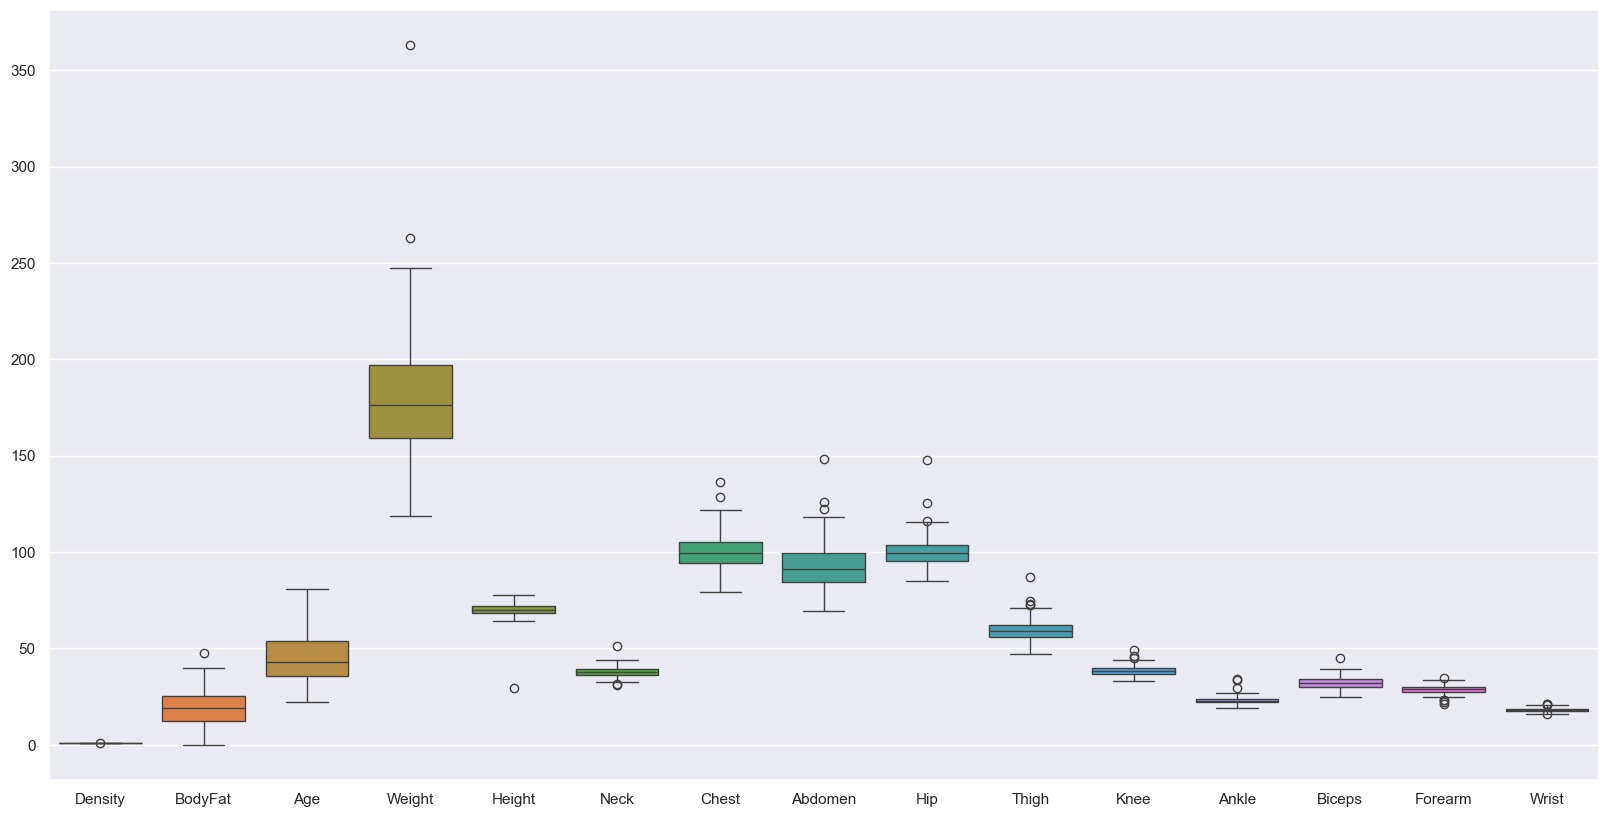

In [59]:
sns.set (rc = {'figure.figsize':(20, 10)})
sns.boxplot(df)

In [60]:
def remOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    return df[(df[col] < upper) & (df[col] > lower)]

In [61]:
feat = df.columns
print("Old Shape: ", df.shape)

for col in feat:
    df = remOutliers(df, col)

print("New Shape: ", df.shape)

Old Shape:  (252, 15)
New Shape:  (230, 15)


In [62]:
scaler = preprocessing.MinMaxScaler()
df[feat] = scaler.fit_transform(df[feat])

df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.614372,0.306733,0.016949,0.291242,0.230769,0.306306,0.341584,0.325103,0.324232,0.491667,0.367925,0.305085,0.503497,0.307692,0.195122
1,0.761134,0.152120,0.000000,0.446029,0.576923,0.513514,0.353960,0.279835,0.467577,0.479167,0.367925,0.559322,0.398601,0.472527,0.463415
2,0.316802,0.630923,0.000000,0.289206,0.115385,0.108108,0.408416,0.380658,0.484642,0.516667,0.518868,0.661017,0.279720,0.065934,0.073171
3,0.657895,0.259352,0.067797,0.539715,0.576923,0.414414,0.556931,0.349794,0.552901,0.537500,0.367925,0.457627,0.531469,0.527473,0.463415
4,0.241903,0.715711,0.033898,0.535642,0.500000,0.144144,0.445545,0.629630,0.576792,0.666667,0.830189,0.661017,0.517483,0.340659,0.341463


<Axes: >

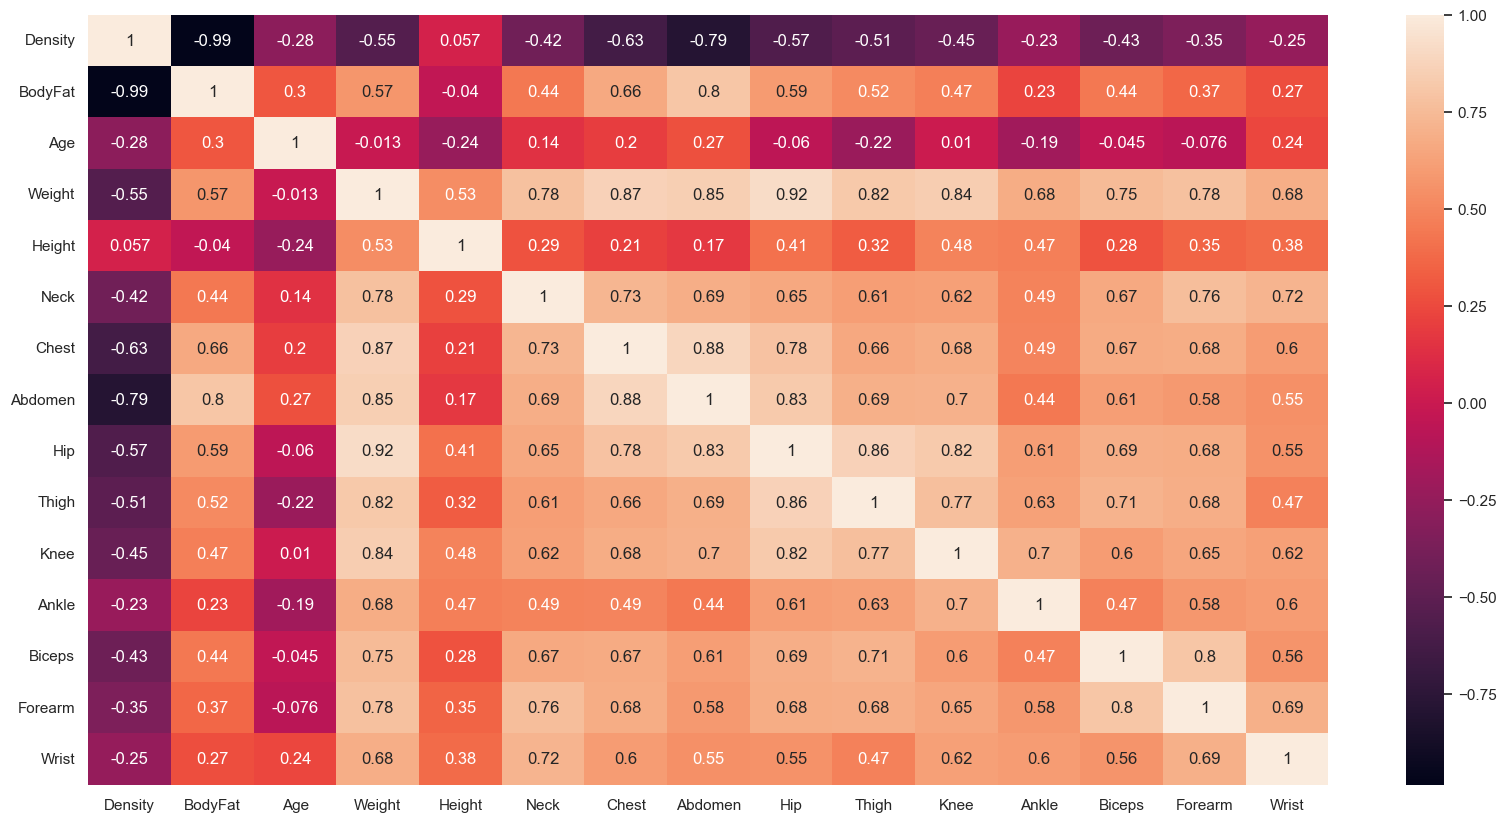

In [63]:
sns.set (rc = {'figure.figsize':(20, 10)})
sns.heatmap(df.corr(), annot=True)

In [64]:
x = df.drop('BodyFat',axis=1)
y = df['BodyFat']

x_train, x_test, y_train, y_test = train_test_split(x, y , random_state=104,test_size=0.2, shuffle=True)

In [65]:
model = Sequential([
    Input(shape=(14,),name='input'),
    Dense(128, activation='relu',name='d1',kernel_regularizer=regularizers.l2(0.01)), 
    Dense(64, activation='relu',name='d2',kernel_regularizer=regularizers.l2(0.01)),
    Dense(32, activation='relu',name='d3',kernel_regularizer=regularizers.l2(0.01)),
    Dense(1),
])

In [66]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ d1 (Dense)                      │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ d2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ d3 (Dense)                      │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'],)

In [68]:
epochs = 50
batch_size = 25
h= model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.11)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 246.2087 - mean_squared_error: 247.6381 - val_loss: 3.3083 - val_mean_squared_error: 0.3402
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7009 - mean_squared_error: 0.2092 - val_loss: 4.9981 - val_mean_squared_error: 0.0819
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3012 - mean_squared_error: 0.0611 - val_loss: 6.1370 - val_mean_squared_error: 0.0608
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2879 - mean_squared_error: 0.0544 - val_loss: 6.6244 - val_mean_squared_error: 0.0351
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6692 - mean_squared_error: 0.0375 - val_loss: 6.7207 - val_mean_squared_error: 0.0361
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6998 - mean_squared_error: 0.0355 - val_loss: 6.6001 - val_mean_squared_error: 0.0351
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5575 - mean_squared_error: 0.0378 - val_loss: 6.4065 - val_mean_squared_e

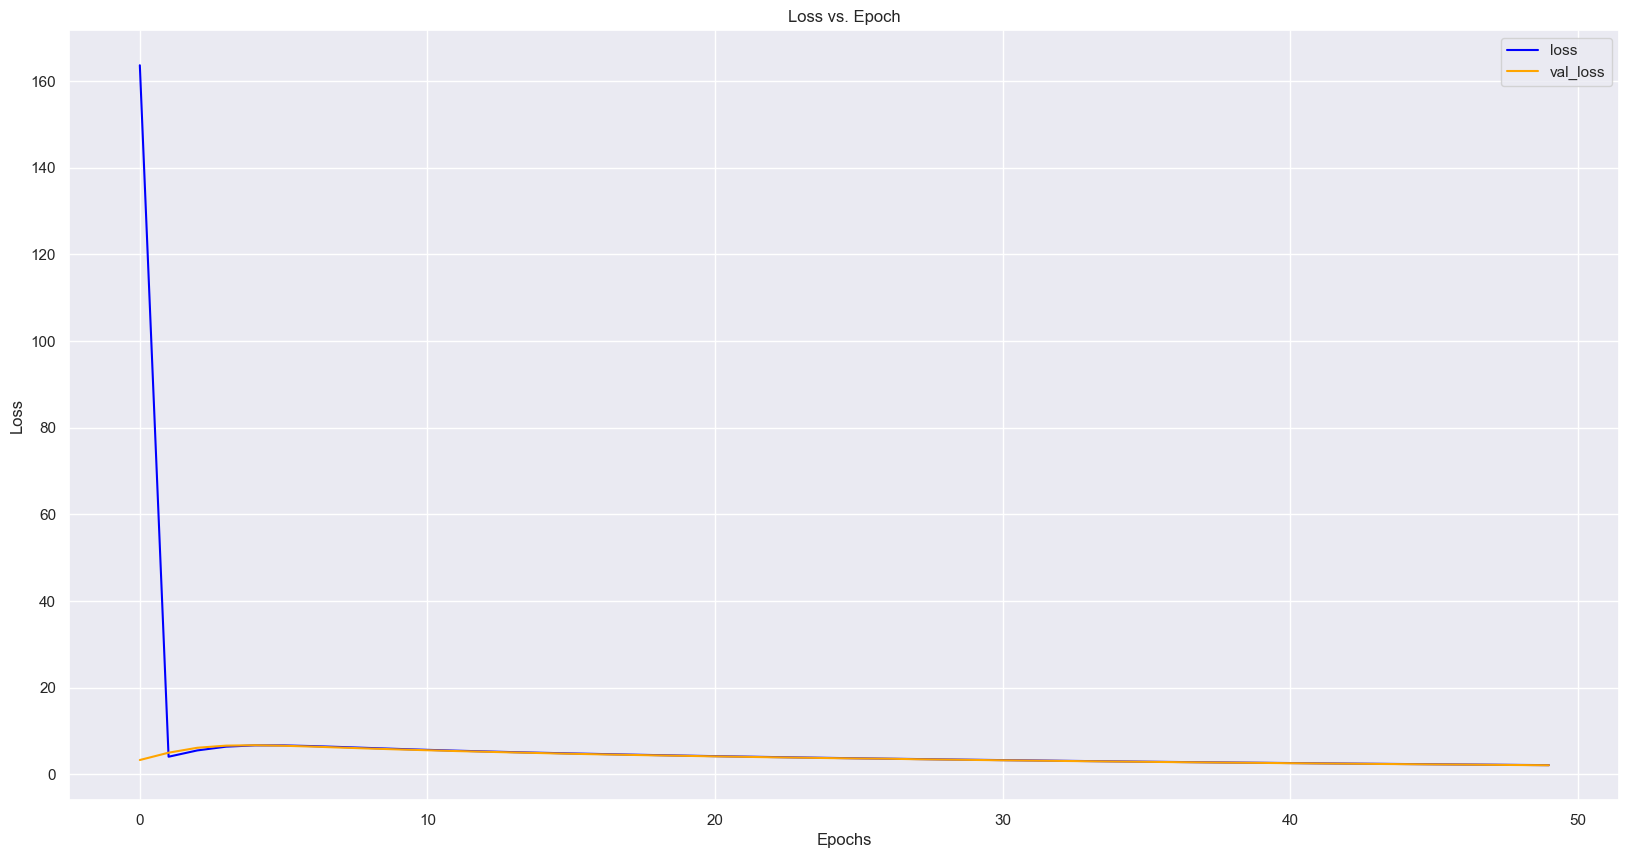

In [69]:
loss = np.array(h.history['loss'])
val_loss = h.history['val_loss']

epochs_r = range(epochs)

plt.plot(epochs_r, loss, label = 'loss', color='blue')
plt.plot(epochs_r, val_loss, label = 'val_loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

In [70]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Mean Squared Error:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0964 - mean_squared_error: 0.0104 
Test Loss: 2.096339225769043
Mean Squared Error: 0.010373949073255062
